In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.stats import poisson

In [2]:
#Este es el nombre del archivo.
ruta = "bio-WormNet-v3.edges"

#Importamos el archivo usando pandas.
datos = pd.read_csv(ruta, 
                    #nrows = 10, 
                    header = None, 
                    sep = " ",
                    usecols=[0,1]
                   )

In [3]:
G = nx.from_pandas_edgelist(datos, source = 0, target =1) 

In [4]:
N = len(G) 
L = len(G.edges)
k = 2*L / N
C = nx.average_clustering(G)

p = k / (N-1)
print('Propiedades generales de tu red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)
print('\nEl coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:\n', p)

Propiedades generales de tu red:
- El número de nodos es:	 16347
- El número de enlaces es:	 762822
- El grado promedio es:		 93.3286841622316


El coeficiente de clustering promedio de la red es:
 0.19391274671175118

El coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:
 0.005709573238849358


In [5]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

In [6]:
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']
df.head()

,Degree,Clustering
0,1.0,0.000000
1,7.0,0.095238
2,6.0,0.066667
3,191.0,0.122678
4,153.0,0.163915


In [7]:
df.Degree.values

array([1., 7., 6., ..., 1., 2., 1.])

In [7]:
K = df.Degree.max()

In [15]:
y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density = True )

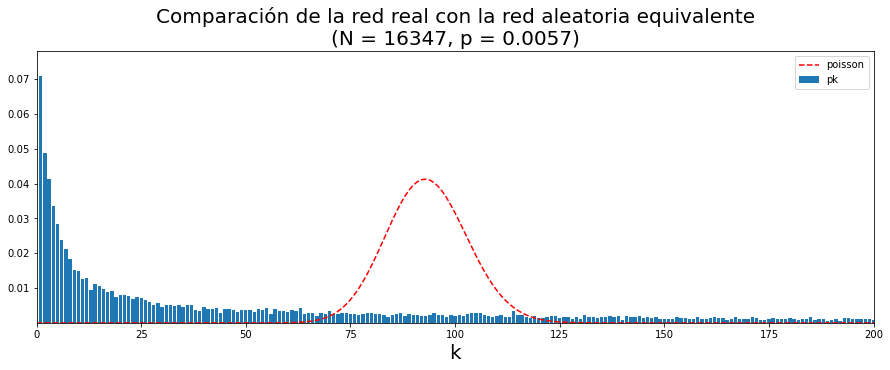

In [25]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 

plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,200])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)
plt.savefig('Comparacion_real_aleatoria', dpi = 200)


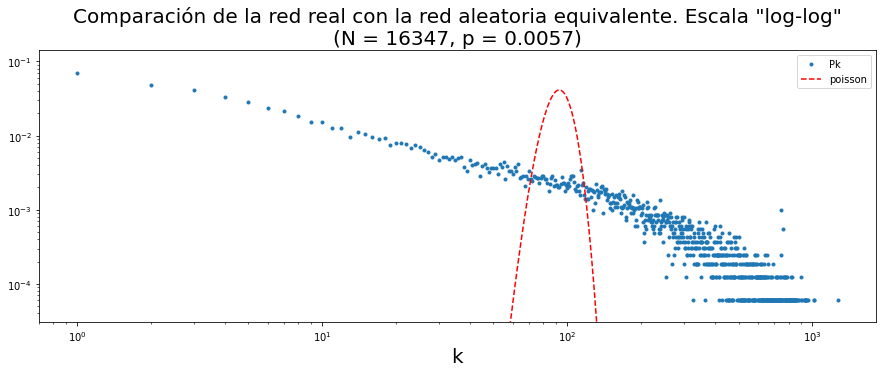

In [26]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = 'Pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])
plt.legend()

plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.4f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)
plt.savefig('Comparacion_log', dpi = 200)


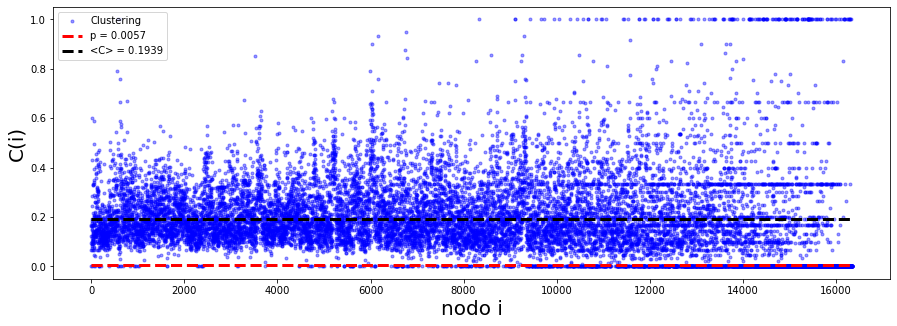

In [20]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

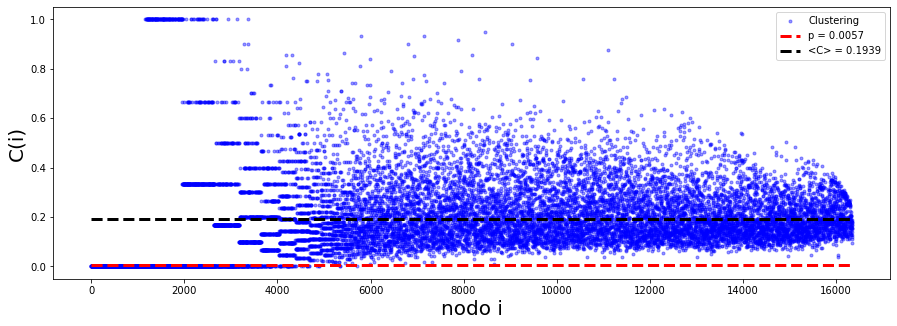

In [21]:
plt.figure(figsize = [15,5])
df.sort_values('Degree').reset_index().Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

In [23]:
X, Y = df.groupby('Degree')['Clustering'].mean().reset_index().values.T

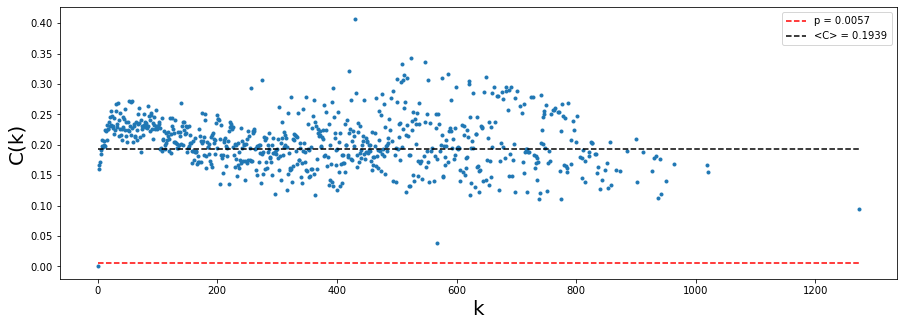

In [27]:
plt.figure(figsize=[15,5])
plt.plot(X, Y, '.')

plt.plot([0,K], [p,p], 'r--', label = 'p = %.4f' %p)
plt.plot([0,K], [C,C], 'k--', label = '<C> = %.4f' %C)

plt.xlabel('k', size = 20)
plt.ylabel('C(k)', size = 20)
plt.legend()
plt.savefig('C_k', dpi = 200)